In [34]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt 
import rasterio
from matplotlib.patches import Rectangle
from shapely.geometry import box, Point

In [35]:
df=pd.read_csv(r"C:\Users\rishi\ml_projects\climate\lat_long_label_4_points.csv")
df

,LAT,LON
0,17.3775,78.04750
1,17.3825,78.04750
2,17.3775,78.05251
3,17.3325,78.06250
4,17.3375,78.06250
...,...,...
2545,17.5225,78.89750
2546,17.5325,78.89750
2547,17.2525,78.90250
2548,17.4625,78.92250


In [36]:
shapefile_path = r'C:\Users\rishi\ml_projects\climate\hmda_boundary\hmda_boundary.shp'
gdf = gpd.read_file(shapefile_path)
#gdf.plot()

In [37]:
gdf_points = gpd.GeoDataFrame(
    df, 
    geometry=gpd.points_from_xy(df['LON'], df['LAT']),
    crs="EPSG:4326"  # Set the coordinate reference system (WGS84)
)

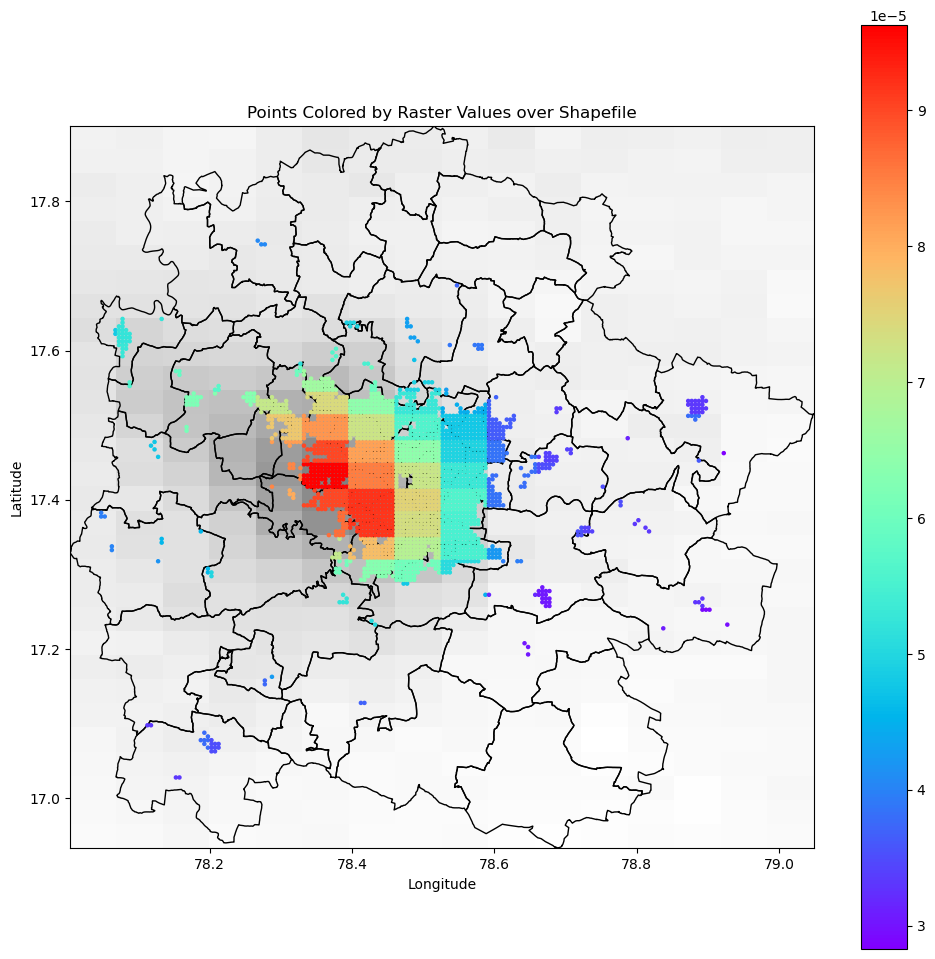

In [39]:
import rasterio
from rasterio.plot import show
from rasterio.features import geometry_mask
import geopandas as gpd
from shapely.geometry import Point, box
import matplotlib.pyplot as plt
import numpy as np

# File paths
tiff_path = r'C:\Users\rishi\ml_projects\climate\2023_tifs\NO2\response.tiff'
shapefile_path = r'C:\Users\rishi\ml_projects\climate\hmda_boundary\hmda_boundary.shp'

# Open the TIFF file
with rasterio.open(tiff_path) as src:
    bounds = src.bounds
    width = src.width
    height = src.height
    transform = src.transform
    raster_data = src.read(1)  # Assuming single band data

# Load the shapefile
shape_data = gpd.read_file(shapefile_path)

# Create a sample points GeoDataFrame
points = [Point(78.5, 17.4), Point(78.6, 17.5), Point(78.5, 17.6)]  # Example points
points_gdf = gdf_points

# Function to extract raster value at a point location
def extract_raster_value(point):
    row, col = src.index(point.x, point.y)  # Get row, col in raster
    return raster_data[row, col] if 0 <= row < height and 0 <= col < width else np.nan

# Extract values for all points
points_gdf['raster_value'] = points_gdf['geometry'].apply(extract_raster_value)

# Plotting the shapefile and the grid
fig, ax = plt.subplots(figsize=(12, 12))
shape_data.plot(ax=ax, color='none', edgecolor='black')

# Plot the TIFF as a background image
with rasterio.open(tiff_path) as src:
    show(src, ax=ax, cmap='Greys', alpha=0.5)

# Plot the points with colors based on raster values
points_gdf.plot(ax=ax, column='raster_value', cmap='rainbow', markersize=5, legend=True)

# Set plot limits
ax.set_xlim(bounds.left, bounds.right)
ax.set_ylim(bounds.bottom, bounds.top)

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Points Colored by Raster Values over Shapefile')

plt.show()
